In [2]:
import os
from dotenv import load_dotenv
import requests
import pandas as pd
import tempfile
import psycopg2
from itertools import chain
load_dotenv()
import numpy as np

In [1]:
import pandas as pd
from analisys.database.db import (
        player_exists_at_db,
        open_request,
        read_sql_tmpfile,
        get_games_for_month, 
        get_profile,
        number_of_games,
        read_pd_profile,
        post_profile)

import matplotlib.pyplot as plt
import requests
from ast import literal_eval
import json

In [2]:
number_of_games('hikaru')

38679

In [ ]:
open_request("""
SELECT game FROM game
where game.year = 2021
and game.month = 3
and (game.white = 'pat_buchanan' or game.black = 'pat_buchanan');
""")

In [46]:
g = open_request("""
SELECT game.id FROM game
where game.black = 'pat_buchanan'
or game.white = 'pat_buchanan';
""")

In [49]:
e = open_request("""
            SELECT COUNT(game) FROM game
            where game.black = 'pat_buchanan'
            or game.white = 'pat_buchanan';
            """)

In [51]:
e[0][0]

70829

In [8]:
get_profile('pat_buchanan')

{'player_name': {0: 'pat_buchanan'},
 'name': {0: 'Pat Buchanan'},
 'url': {0: 'https://www.chess.com/member/Pat_Buchanan'},
 'title': {0: nan},
 'avatar': {0: 'https://images.chesscomfiles.com/uploads/v1/user/29584920.b3462b3c.200x200o.b4b455f59035.jpeg'},
 'followers': {0: 99},
 'country': {0: 'MX'},
 'location': {0: 'Ciudad de M&eacute;xico'},
 'joined': {0: 1471850943},
 'status': {0: 'basic'},
 'is_streamer': {0: 'f'},
 'twitch_url': {0: nan},
 'verified': {0: 'f'},
 'league': {0: 'Legend'}}

In [41]:
get_games_for_month('pat_buchanan')

array([['2016_8', '43'],
       ['2016_10', '5'],
       ['2016_11', '262'],
       ['2016_12', '842'],
       ['2017_1', '1120'],
       ['2017_2', '785'],
       ['2017_3', '972'],
       ['2017_4', '1429'],
       ['2017_5', '1979'],
       ['2017_6', '1120'],
       ['2017_7', '1169'],
       ['2017_8', '1032'],
       ['2017_9', '867'],
       ['2017_10', '672'],
       ['2017_11', '1372'],
       ['2017_12', '1179'],
       ['2018_1', '923'],
       ['2018_2', '353'],
       ['2018_3', '233'],
       ['2018_4', '1181'],
       ['2018_5', '1050'],
       ['2018_6', '697'],
       ['2018_7', '1616'],
       ['2018_8', '409'],
       ['2018_9', '855'],
       ['2018_10', '1626'],
       ['2018_11', '1110'],
       ['2018_12', '488'],
       ['2019_1', '685'],
       ['2019_2', '1921'],
       ['2019_3', '720'],
       ['2019_11', '98'],
       ['2019_12', '176'],
       ['2020_1', '1511'],
       ['2020_2', '1122'],
       ['2020_3', '604'],
       ['2020_4', '165'],
       ['2020_5

In [39]:
get_games_for_month('pat_buchanan')

array([['2016_8', '43'],
       ['2016_10', '5'],
       ['2016_11', '262'],
       ['2016_12', '842'],
       ['2017_1', '1120'],
       ['2017_2', '785'],
       ['2017_3', '972'],
       ['2017_4', '1429'],
       ['2017_5', '1979'],
       ['2017_6', '1120'],
       ['2017_7', '1169'],
       ['2017_8', '1032'],
       ['2017_9', '867'],
       ['2017_10', '672'],
       ['2017_11', '1372'],
       ['2017_12', '1179'],
       ['2018_1', '923'],
       ['2018_2', '353'],
       ['2018_3', '233'],
       ['2018_4', '1181'],
       ['2018_5', '1050'],
       ['2018_6', '697'],
       ['2018_7', '1616'],
       ['2018_8', '409'],
       ['2018_9', '855'],
       ['2018_10', '1626'],
       ['2018_11', '1110'],
       ['2018_12', '488'],
       ['2019_1', '685'],
       ['2019_2', '1921'],
       ['2019_3', '720'],
       ['2019_11', '98'],
       ['2019_12', '176'],
       ['2020_1', '1511'],
       ['2020_2', '1122'],
       ['2020_3', '604'],
       ['2020_4', '165'],
       ['2020_5

In [5]:
open_request("select * from moves where moves.id = 1703083688")

[(1703083688,
  '1 2 3 4 5 6 7 8 9 10 11 12 13',
  'e4 Nf3 Nc3 d4 Nxd4 Bb5 Nxc6 Bxc6+ O-O Bg5 Qf3 Bxf6 Rad1',
  'c5 Nc6 d6 cxd4 Nf6 Bd7 Bxc6 bxc6 e5 Be7 h6 Bxf6 -',
  '1.6000000000000014 0.5 0.29999999999999716 0.10000000000000142 4.5 5.600000000000001 0.7999999999999972 1.2000000000000028 3.3999999999999986 0.3999999999999986 1.4000000000000057 0.29999999999999716 nan',
  '8.399999999999999 5.300000000000004 2.0 2.799999999999997 9.0 1.3000000000000007 0.8000000000000007 6.300000000000001 5.800000000000001 13.099999999999998 1.4999999999999998 nan',
  '54.1 52.5 52.0 51.7 51.6 47.1 41.5 40.7 39.5 36.1 35.7 34.3 34.0',
  '58.1 49.7 44.4 42.4 39.6 30.6 29.3 28.5 22.2 16.4 3.3 1.8')]

In [ ]:
open_request(f"""
            SELECT year, month FROM game
            Where game.black = 'pat_buchanan'
            OR game.white = 'pat_buchanan'
            """)

{'player_name': {0: 'pat_buchanan'},
 'name': {0: 'Pat Buchanan'},
 'url': {0: 'https://www.chess.com/member/Pat_Buchanan'},
 'title': {0: nan},
 'avatar': {0: 'https://images.chesscomfiles.com/uploads/v1/user/29584920.b3462b3c.200x200o.b4b455f59035.jpeg'},
 'followers': {0: 99},
 'country': {0: 'MX'},
 'location': {0: 'Ciudad de M&eacute;xico'},
 'joined': {0: 1471850943},
 'status': {0: 'basic'},
 'is_streamer': {0: 'f'},
 'twitch_url': {0: nan},
 'verified': {0: 'f'},
 'league': {0: 'Legend'}}

In [56]:
a = dates.pivot_table(index = ['year', 'month'], aggfunc ='size')

In [66]:
dates_hist = np.array(
        [
            [
                f'{x[0]}_{x[1]}',
                int(a[x])            ]
            for x in a.index
        ]
    )

In [ ]:
dates_hist

In [ ]:
np.array([list([f'{x[0]}_{x[1]}' for x in a.index]), [a[item] for item in a.index]])

In [35]:
a[(2016,  8)]

43

In [34]:
 a.index[:12]

MultiIndex([(2016,  8),
            (2016, 10),
            (2016, 11),
            (2016, 12),
            (2017,  1),
            (2017,  2),
            (2017,  3),
            (2017,  4),
            (2017,  5),
            (2017,  6),
            (2017,  7),
            (2017,  8)],
           names=['year', 'month'])

<BarContainer object of 2 artists>

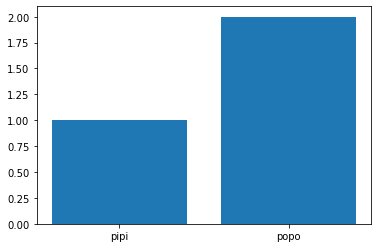

In [38]:
plt.bar(['pipi','popo'],[1,2])

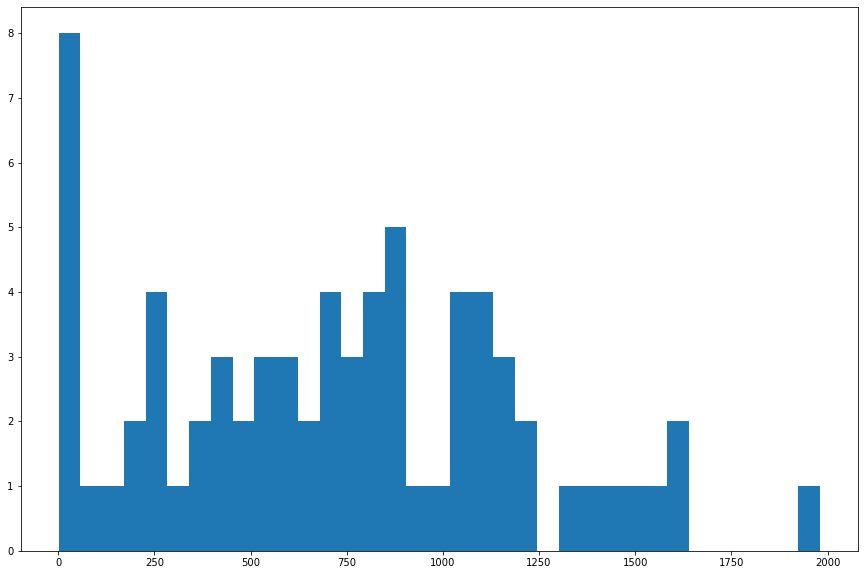

In [53]:
plt.hist([a[item] for item in a.index], bins = 35);

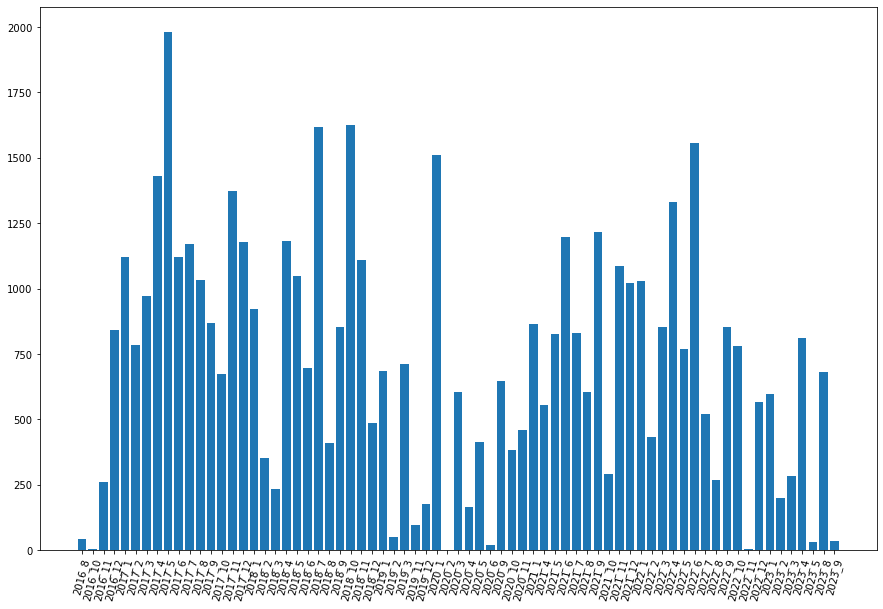

In [46]:
plt.rcParams["figure.figsize"] = (15,10)
plt.bar(list([f'{x[0]}_{x[1]}' for x in a.index]), [a[item] for item in a.index])
plt.xticks(rotation=75);

In [27]:
a[(2017,8)]

1032

In [19]:
line = [f'{str(dates.year)}_{str(item.month)}' for item in dates]

AttributeError: 'str' object has no attribute 'year'

In [18]:
line[:2]

['0_year     2016\nmonth       8\nName: 0, dtype: int64',
 '1_year     2016\nmonth       8\nName: 1, dtype: int64']

In [28]:
def get_n_games_hist_data(player_name):
    w = tuple([str(x) for x in w])

    data = read_sql_tmpfile(f"""
            SELECT * FROM moves
            Where moves.id in {w}
            """)

IndentationError: expected an indented block (<ipython-input-28-9eb9771c9c00>, line 2)

In [30]:
read_sql_tmpfile(f"""
            SELECT  FROM player
            Where player.player_name ='pat_buchanan'
            """)

In [31]:
a

,player_name,name,url,title,avatar,followers,country,location,joined,status,is_streamer,twitch_url,verified,league
0,pat_buchanan,Pat Buchanan,https://www.chess.com/member/Pat_Buchanan,NaN,https://images.chesscomfiles.com/uploads/v1/us...,99,MX,Ciudad de M&eacute;xico,1471850943,basic,f,NaN,f,Legend


In [ ]:
@dataclass
class Player:
    player_name: str
    profile: dict() = Optional

    def get_profile(self.player_name):
        
    def wdl(self):
        return get_n_games_hist_data(self.player_name)
    def games(self, time_control = False):
        return get_all_games(self.player_name, time_control = time_control)
    def games_where(self, result:float, color:str, time_control = False):
        return get_games_where(self.player_name, result, color, time_control = time_control)
    def moves(game_links):
        return get_moves(game_links)

In [5]:
player_exists_at_db('pat_buchanan')

True

In [13]:
games =open_request("select * from game where game.black = 'pat_buchanan'")

In [23]:
w = [1703083688,1703080552, 1703079032]

In [21]:
games[2]

(1703079032,
 'box-t',
 'pat_buchanan',
 '01:13:09',
 2016,
 8,
 25,
 1252,
 1205,
 1.0,
 0.0,
 '60',
 'c30',
 '00:01:37',
 'resignation',
 23)

In [15]:
moves =open_request("select * from moves where moves.id = 1703083688")

In [16]:
moves

[(1703083688,
  '1 2 3 4 5 6 7 8 9 10 11 12 13',
  'e4 Nf3 Nc3 d4 Nxd4 Bb5 Nxc6 Bxc6+ O-O Bg5 Qf3 Bxf6 Rad1',
  'c5 Nc6 d6 cxd4 Nf6 Bd7 Bxc6 bxc6 e5 Be7 h6 Bxf6 -',
  '1.6000000000000014 0.5 0.29999999999999716 0.10000000000000142 4.5 5.600000000000001 0.7999999999999972 1.2000000000000028 3.3999999999999986 0.3999999999999986 1.4000000000000057 0.29999999999999716 nan',
  '8.399999999999999 5.300000000000004 2.0 2.799999999999997 9.0 1.3000000000000007 0.8000000000000007 6.300000000000001 5.800000000000001 13.099999999999998 1.4999999999999998 nan',
  '54.1 52.5 52.0 51.7 51.6 47.1 41.5 40.7 39.5 36.1 35.7 34.3 34.0',
  '58.1 49.7 44.4 42.4 39.6 30.6 29.3 28.5 22.2 16.4 3.3 1.8')]

In [18]:
def read_sql_tmpfile(query):
    conn = get_ask_connection()
    with tempfile.TemporaryFile() as tmpfile:
        copy_sql = "COPY ({query}) TO STDOUT WITH CSV {head}".format(
           query=query, head="HEADER"
        )
        cur = conn.cursor()
        cur.copy_expert(copy_sql, tmpfile)
        tmpfile.seek(0)
        df = pd.read_csv(tmpfile)
        return df

In [ ]:
w = tuple([str(x) for x in w])

read_sql_tmpfile(f"""
            SELECT * FROM moves
            Where moves.id in {w}
            """)

In [ ]:
def get_ask_connection():
    CONN_STRING = os.getenv("PSYCOPG2_CONN_STRING")
    return psycopg2.connect(CONN_STRING, port = 5433)

def player_exists_at_db(player_name: str):
    conn = get_ask_connection()
    with conn.cursor() as curs:
        curs.execute(
            f"select player_name from player where player_name='{player_name}'"
        )
        result = curs.fetchall()
    if len(result) == 1:
        return True
    return False

def open_request(sql_question:str):
    conn = get_ask_connection()
    with conn.cursor() as curs:
        curs.execute(
            sql_question
        )
        result = curs.fetchall()
    return result

def ask_months_in(player_name: str) -> list[tuple:tuple]:
    """
    It ask the db for the already asked months at chess com
    it returns them as a list of tuples
    """
    conn = get_ask_connection()
    with conn.cursor() as curs:
        curs.execute(f"select dates from months where player_name='{player_name}'")
        result = curs.fetchall()
    join_result = list(chain.from_iterable(result))
    result_as_list_of_tuples = [
        (int(x.split("-")[0]), int(x.split("-")[1])) for x in join_result
    ]
    return result_as_list_of_tuples


def ask_links_with_this_players(player_name, tuple_of_players) -> set():
    """
    Ask db the game.link for every past game of the player with any new user,
    we need to know it's some game is already at the database or if some player is not
    """
    conn = get_ask_connection()
    with conn.cursor() as curs:
        curs.execute(
            f"select link from game where white='{player_name}' and black in {tuple_of_players}"
        )
        result = curs.fetchall()
        curs.execute(
            f"select link from game where black='{player_name}' and white in {tuple_of_players}"
        )
        result_2 = curs.fetchall()
    result = set(list(chain.from_iterable(result)))
    result_2 = set(list(chain.from_iterable(result_2)))
    result.update(result_2)
    return set([int(x) for x in result])


def get_all_players():
    conn = get_ask_connection()
    with conn.cursor() as curs:
        curs.execute(f"select player_name from player")
        result = curs.fetchall()
    result = set(list(chain.from_iterable(result)))
    return result